# Case Background

This dataset records the daily operations and customer behavior of a local restaurant. 
By analyzing it, the restaurant or fast-food outlet can gain insights into customer spending patterns, sales trends at different times. These insights can be used to optimize menu offerings, and promotional strategies, helping to improve overall decision-making.

    
### 1. Columns:
|No. | Columns | Description |
|:--- | :--- |:--- |
| 1 |order_id | a unique identifier for each order |
| 2 |date | date of the transaction |
| 3 |item_name | name of the food |
| 4 |item_type | category of item (Fastfood or Beverages) |
| 5 |item_price | price of the item for 1 quantity |
| 6 |Quantity | how much quantity the customer orders |
| 7 |transaction_amount | the total amount paid by customers |
| 8 |transaction_type | payment method (cash, online, others) |
| 9 |received_by | gender of the person handling the transaction |
| 10 |time_of_sale | different times of the day (Morning, Evening, Afternoon, Night, Midnight) |

### 2. Import Libraries:

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
from pyecharts.charts import Bar, Line, Pie, Sunburst
from pyecharts import options as opts
import plotly.graph_objects as go

### 3. Data Preview

In [69]:
# Read and view data
data =  pd.read_csv("Balaji Fast Food Sales.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [5]:
data.sample(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
118,119,05-12-2022,Panipuri,Fastfood,20,10,200,Cash,Mr.,Evening
718,719,05-09-2022,Vadapav,Fastfood,20,15,300,Cash,Mrs.,Midnight
767,768,01-12-2023,Sandwich,Fastfood,60,14,840,Cash,Mr.,Afternoon
375,376,12-04-2022,Frankie,Fastfood,50,15,750,Cash,Mr.,Midnight
429,430,11-05-2022,Sandwich,Fastfood,60,4,240,Online,Mr.,Night
119,120,07-10-2022,Frankie,Fastfood,50,2,100,Cash,Mrs.,Evening
57,58,02-03-2023,Vadapav,Fastfood,20,6,120,Online,Mrs.,Morning
920,921,9/21/2022,Vadapav,Fastfood,20,14,280,Cash,Mr.,Midnight
13,14,11/25/2022,Frankie,Fastfood,50,4,200,Online,Mr.,Morning
516,517,07-02-2022,Panipuri,Fastfood,20,13,260,Online,Mr.,Evening


In [6]:
data.dtypes

order_id               int64
date                  object
item_name             object
item_type             object
item_price             int64
quantity               int64
transaction_amount     int64
transaction_type      object
received_by           object
time_of_sale          object
dtype: object

In [7]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

### 4. Data Processing

In [8]:
# view missing data
data.isnull().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [9]:
# view duplicated data
data.duplicated().sum()

0

In [24]:
set(data['transaction_type'].tolist())

{'Cash', 'Online', 'others'}

In [10]:
# Modify the order_id format
data['order_id'] = data['order_id'].astype(str)
#Convert the date column to date format
data['date'] = pd. to_datetime (data['date'])
#Fill missing values ​​in the transaction_type column with "Others
data['transaction_type']. fillna('others', inplace=True)

### 5. Data exploration and Visualization

#### Descriptive Statistics

In [11]:
data.describe(include=[np.number])

,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000
mean,33.315000,8.162000,275.230000
std,14.921744,4.413075,204.402979
min,20.000000,1.000000,20.000000
25%,20.000000,4.000000,120.000000
50%,25.000000,8.000000,240.000000
75%,50.000000,12.000000,360.000000
max,60.000000,15.000000,900.000000


**💬 Observation:**  
1. The unit price is between `$20` and `$60`, the average unit price is about `$33,315`, and the standard deviation is about 14.92.
2. The average number of customer orders is about 8.16, the median is 8, the minimum is 1, the maximum is 15, and the quartile range shows that most orders are between 4 and 12.
3. The total amount paid by customers is an average of `$275.23`, the median is `$240`, the minimum is `$20`, the maximum is `$900`, and the standard deviation is 204.4, indicating that the distribution range of transaction amounts is relatively wide

#### Consumption habits analysis

In [12]:
df_name = data.groupby('item_name').agg('sum')[['quantity']]
df_name.sort_values(by='quantity',ascending=False,inplace=True)
df_name

,quantity
item_name,
Cold coffee,1361
Sugarcane juice,1278
Panipuri,1226
Frankie,1150
Sandwich,1097
Aalopuri,1044
Vadapav,1006


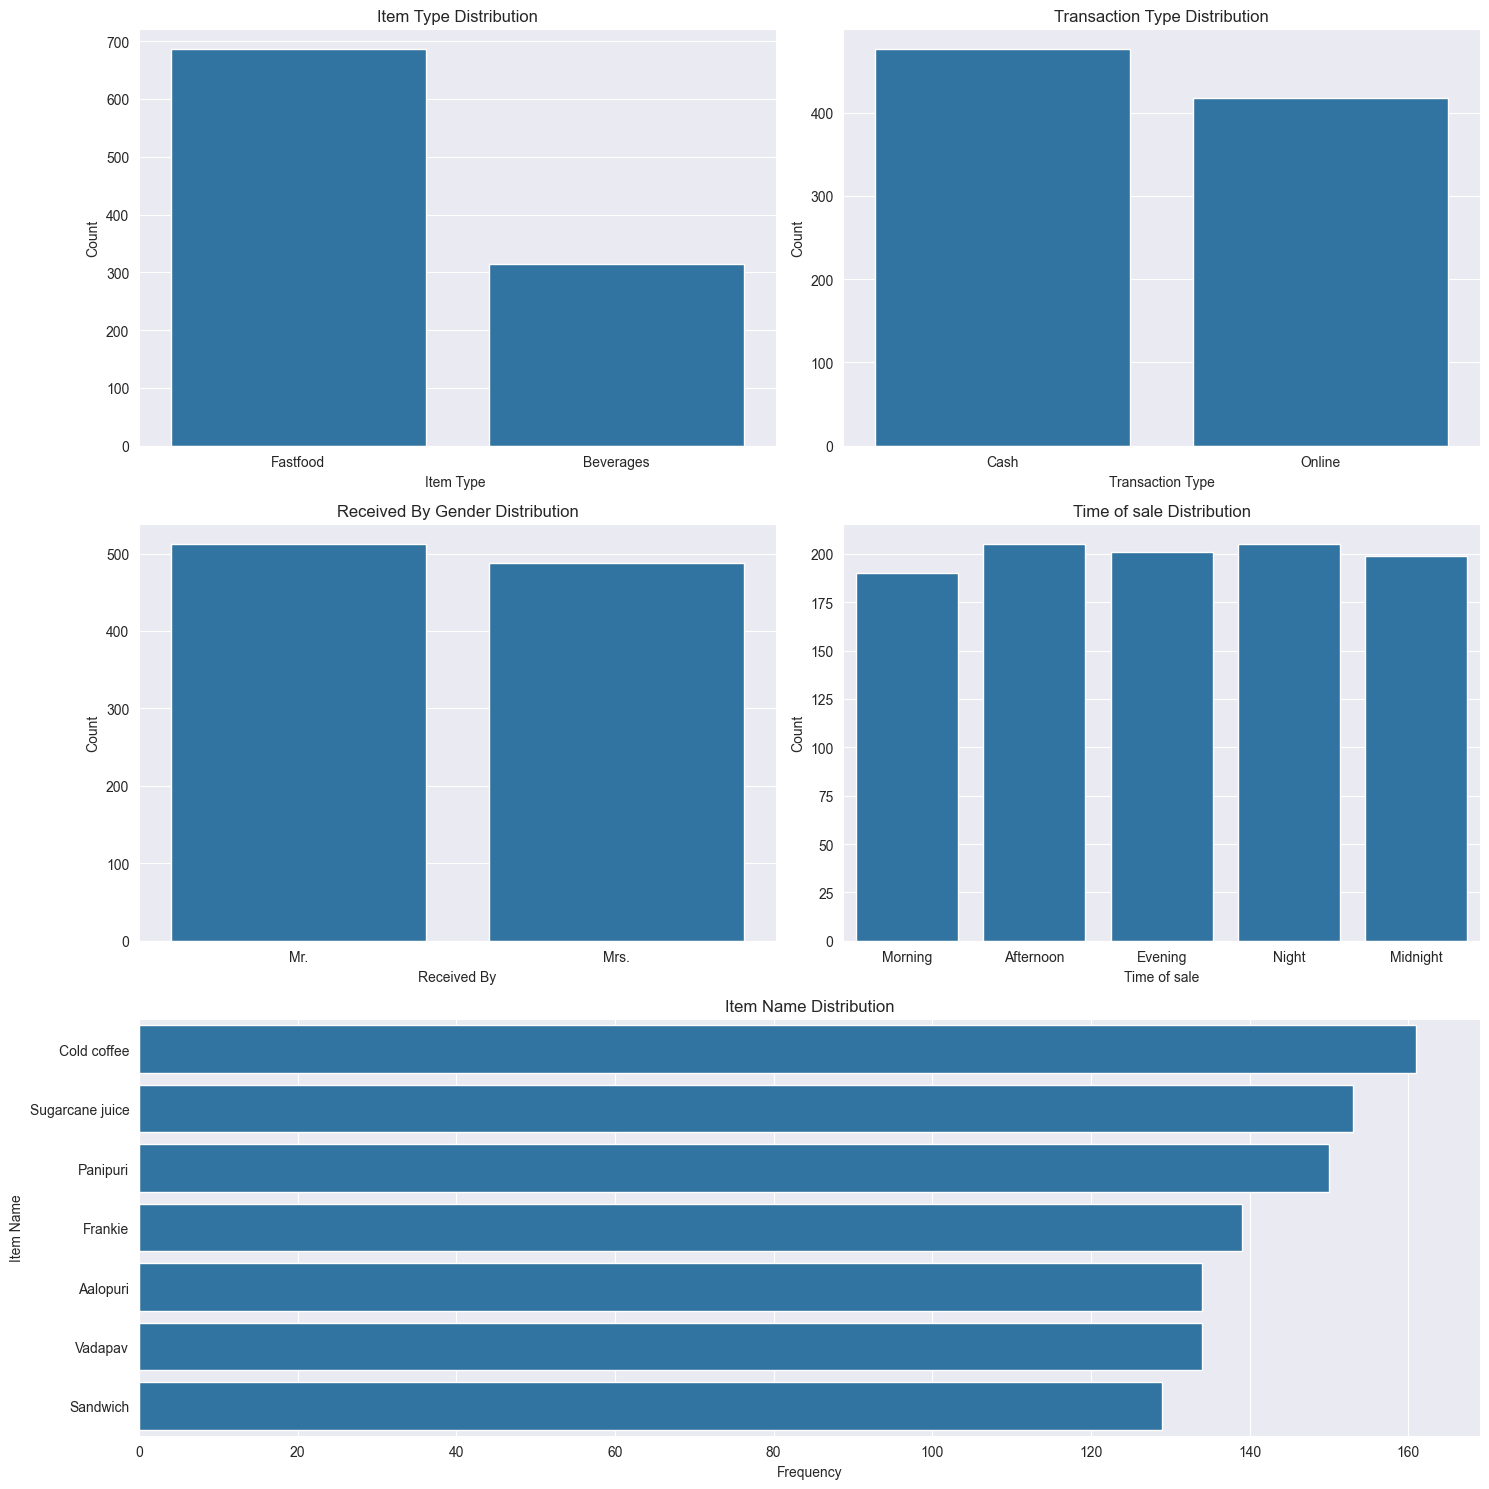

In [67]:
sns. set_style("darkgrid")

fig = plt.figure(figsize=(15,15))

#add ax
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3, 2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)

ax5 = fig.add_subplot(3,1,3)

# Item_ type distribution
sns. countplot (x='item_type', data=data, ax=ax1)
ax1.set_title('Item Type Distribution')
ax1. set_xlabel("Item Type ")
ax1. set_ylabel('Count')
# Transaction_type distribution
sns. countplot(x='transaction_type', data=data, ax=ax2)
ax2.set_title('Transaction Type Distribution')
ax2. set_xlabel('Transaction Type')
ax2. set_ylabel('Count')

# Received_by distribution
sns.countplot(x='received_by', data=data, ax=ax3)
ax3.set_title('Received By Gender Distribution')
ax3.set_xlabel('Received By')
ax3.set_ylabel('Count')
# Time_of_sale distribution
sns. countplot (x='time_of_sale', data=data, ax=ax4, order=['Morning','Afternoon','Evening','Night','Midnight'])
ax4.set_title('Time of sale Distribution')
ax4.set_xlabel('Time of sale')
ax4.set_ylabel('Count')
#Item name distribution
item_name_counts = data['item_name'].value_counts()
sns.barplot(y=item_name_counts.index, x=item_name_counts, ax=ax5)
ax5.set_title('Item Name Distribution')
ax5. set_xlabel("Frequency")
ax5.set_ylabel("Item Name")


plt.tight_layout()
plt.show()

**💬 Observation:**  \
1.Fast food is the category with the highest transaction volume, suggesting it might be the restaurant's signature offering.
2.Cash and online payments are the two most common transaction methods, with cash being used slightly more than online payments, while other payment methods are used less frequently.
3.The number of orders handled by male and female staff seems roughly equal, indicating a balanced distribution of work by gender.
4.Sales in the afternoon and evening are higher compared to other times of the day, possibly reflecting customer habits or the restaurant's peak hours.
5.The best-selling item is iced coffee, while sandwiches are sold the least.

In [78]:
# Group by item_name to calculate total transaction_amount and total quantity
item_summary = data.groupby(['item_type','item_name']).agg(
    total_transaction_amount=('transaction_amount', 'sum'),
    total_quantity=('quantity', 'sum'),
    avg_price=('item_price', 'mean')  # If you want to see average price
).reset_index()

# Display the summary and correlation
item_summary.sort_values(by='total_transaction_amount',ascending=False,inplace=True)
item_summary

,item_type,item_name,total_transaction_amount,total_quantity,avg_price
5,Fastfood,Sandwich,65820,1097,60.0
3,Fastfood,Frankie,57500,1150,50.0
0,Beverages,Cold coffee,54440,1361,40.0
1,Beverages,Sugarcane juice,31950,1278,25.0
4,Fastfood,Panipuri,24520,1226,20.0
2,Fastfood,Aalopuri,20880,1044,20.0
6,Fastfood,Vadapav,20120,1006,20.0


**💬 Observation:**  \
In the Beverages category, although Cold Coffee is priced significantly higher than Sugarcane Juice, it continues to exhibit a high sales volume. This suggests low price sensitivity among consumers when choosing beverages.

In the Fast Food category, Panipuri demonstrates considerably higher sales compared to Aalopuri and Vadapav, despite all three items being priced identically. This suggests that factors like product appeal or customer preferences are driving the higher demand for Panipuri, rather than pricing.

#### Comparing consumer preferences over time

In [14]:
df_time = data.groupby(['time_of_sale','item_type','item_name']).agg('sum')[['quantity']]
df_time.sort_values(by='quantity',inplace=True)
df_time = df_time.reset_index()
df_time

,time_of_sale,item_type,item_name,quantity
0,Evening,Fastfood,Aalopuri,136
1,Afternoon,Fastfood,Sandwich,164
2,Night,Fastfood,Vadapav,183
3,Afternoon,Fastfood,Vadapav,194
4,Morning,Fastfood,Vadapav,195
5,Midnight,Fastfood,Frankie,198
6,Evening,Fastfood,Vadapav,199
7,Midnight,Fastfood,Sandwich,201
8,Midnight,Beverages,Cold coffee,203
9,Morning,Fastfood,Frankie,204


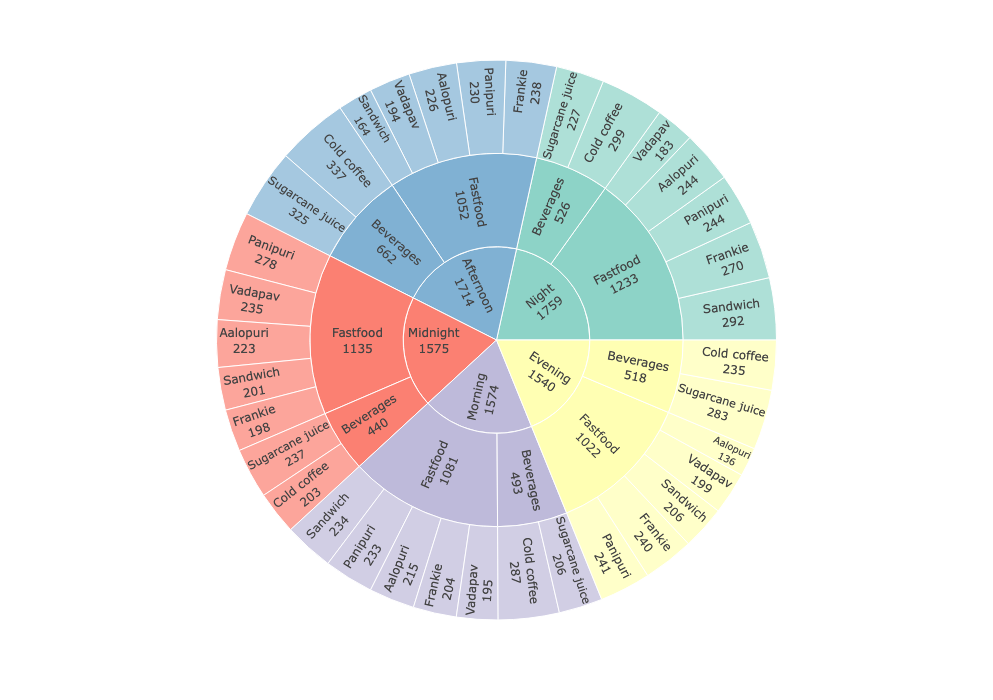

In [52]:
# Create sunburst
fig = px.sunburst(df_time, path=['time_of_sale', 'item_type', 'item_name'], values='quantity',
                  color='time_of_sale',
                  color_discrete_sequence=px.colors.qualitative.Set3,
                  width=700, height=700)



fig.update_traces(
    textinfo="label+value",
    insidetextorientation='radial'
)

fig.show()

**💬 Observation:**  \
The most popular dishes in the morning are: Drinks: Cold coffee, Fast food: Sandwich \
The most popular dishes in the afternoon are: Drinks: Cold coffee, Fast food: Frankie\
The most popular dishes in the evening are: Drinks: Sugarcane juice, Fast food: Panipuri\
The most popular dishes in the evening are: Drinks: Cold coffee, Fast food: Sandwich\
The most popular dishes at midnight are: Drinks: Sugarcane juice, Fast food: Panipuri

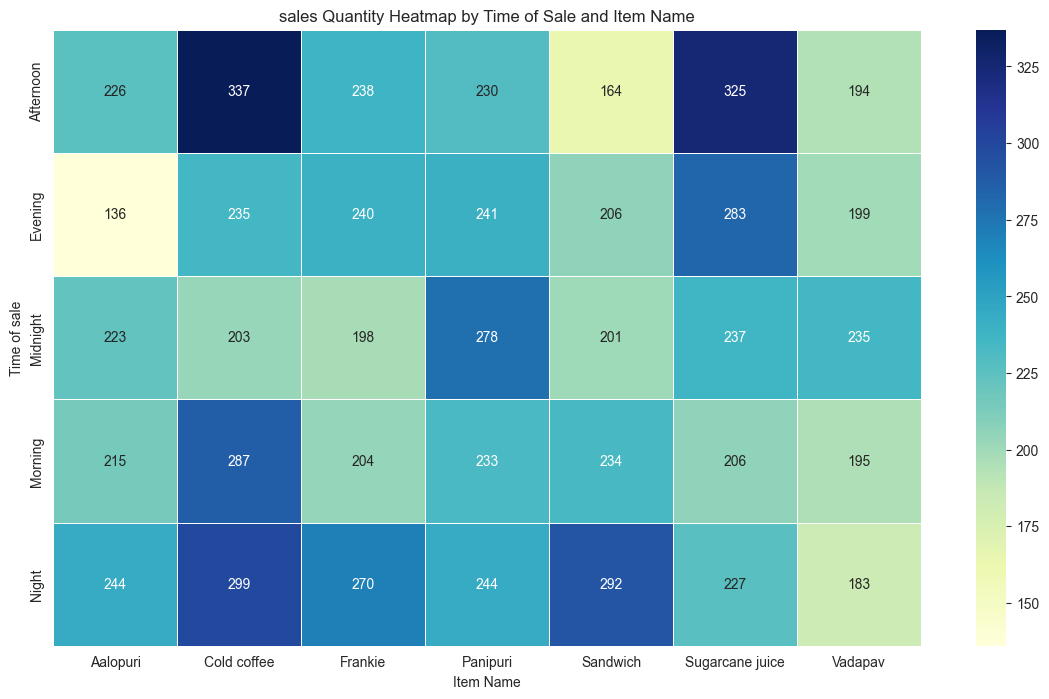

In [89]:
time_item_name_pivot = pd.pivot_table(data, values='quantity',
                                      index='time_of_sale',
                                      columns='item_name',
                                      aggfunc=np.sum,
                                      fill_value=0)
#Create heat maps of consumption groups for different time periods and dishes
plt.figure(figsize=(14,8))
sns.heatmap(time_item_name_pivot, annot=True, fmt=".0f", linewidths=.5,cmap="YlGnBu")
plt.title("sales Quantity Heatmap by Time of Sale and Item Name")
plt.ylabel("Time of sale")
plt.xlabel("Item Name")
plt. show()

From the data, we can know:
1. Cold coffee is a relatively popular drink throughout the day, especially in the morning, afternoon and evening, which may be related to people's habit of needing to refresh themselves in the morning and evening.
2. Sandwiches sell well in the morning and evening, so it can be considered as the main product for breakfast and dinner.
Sugarcane juice sells well in the afternoon, which may be related to the hot weather in the afternoon and people need to quench their thirst, but sales decline in the evening.
4. Vadapav and Panipuri are very popular during the midnight period, which may be because they are more suitable for consumption as snacks at night.
5. Aalopuri sells well in the evening and midnight, and has the lowest sales in the evening.

Suggestions:
1. Prepare enough cold coffee and sandwiches in the morning as they are hot-selling items during breakfast time.
2. Prepare more sugarcane juice in the afternoon as it is a popular choice for customers during hot weather.
3. In the evening to midnight, Vadapav and Panipuri should be prepared to meet the snack needs of night consumers.
4. Aalopuri, as a product that sells well in the evening and midnight, also needs to be prepared in moderation.
5. Considering that cold coffee has a steady sales volume throughout the day, it should be ensured that there is sufficient supply throughout the day.